In [3]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


# **1. 결측치 제거**

In [51]:
import io

df = pd.read_csv(io.BytesIO(uploaded['vgames2.csv']))
#df = df[df['측정소명'] == '송파구']
df
#df = df.reset_index(drop = True)
df[0:11]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [52]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [53]:
df.isnull().sum() # 데이터 결측치의 합계를 보여준다

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [54]:
df = df.dropna() #결측치를 버려준다
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [55]:
df = df.reset_index(drop = True)
df = df.drop(df.columns[[0]], axis = 1)
df[0:11]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


# **2. 년도 타입 바꾸기**

In [56]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [57]:
#pd.to_numeric(df['Year'], downcast='integer')
df = df.astype({'Year':'int64'})
df.dtypes
df[0:11]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


#**3. K, M제거**

In [58]:
def remove(a):
    return a.replace('M','')

df['NA_Sales'] = df['NA_Sales'].apply(remove)
df['EU_Sales'] = df['EU_Sales'].apply(remove)
df['JP_Sales'] = df['JP_Sales'].apply(remove)
df['Other_Sales'] = df['Other_Sales'].apply(remove)

df[0:11]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [59]:
def removek(c): # K를 제거하고 float형으로 바꿔주는 함수
    return float(c.replace('K',''))

def contain(y):
  dfcontain = df[df[y].str.contains('K')] # df[y]에서 K가 포함된 데이터만 불러온다
  dfcontain[y]  = dfcontain[y].apply(removek)*0.001 #df[y]에서 K를 제거해주고 K 단위는 M 단위의 1/1000이므로 0.001을 곱해준다
  return dfcontain

def notcontain(z): #K를 포함하지 않는 행만 나타낸다
  dfnotcontain = df[~df[z].str.contains('K')]
  return dfnotcontain


#pd.concat([contain('Na_Sales'), notcontain('Na_Sales')])

contain('NA_Sales').head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0.00,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0.00,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0.00,0,0.19,0


In [60]:
notcontain('NA_Sales').head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [61]:
df = pd.concat([notcontain('NA_Sales'),contain('NA_Sales')])
df = pd.concat([notcontain('EU_Sales'),contain('EU_Sales')])
df = pd.concat([notcontain('JP_Sales'),contain('JP_Sales')])
df = pd.concat([notcontain('Other_Sales'),contain('Other_Sales')])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16036,Project Setsuna,PSV,2016,Role-Playing,Square Enix,0,0,0.05,0.0
16234,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08
6880,StarCraft II: Heart of the Swarm,PC,2013,Strategy,Activision,0.82,0.65,0,0.19
5468,Digimon World 2,PS,2000,Role-Playing,Namco Bandai Games,0.23,0.16,0.16,0.04


# **4. Sales 데이터 float형으로 바꾸기**

In [48]:
df2 = df.iloc[:,5:9].astype(float)
df1 = df.iloc[:,0:5]
df = pd.concat([df1, df2], axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16036,Project Setsuna,PSV,2016,Role-Playing,Square Enix,0.00,0.00,0.05,0.00
16234,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08
6880,StarCraft II: Heart of the Swarm,PC,2013,Strategy,Activision,0.82,0.65,0.00,0.19
5468,Digimon World 2,PS,2000,Role-Playing,Namco Bandai Games,0.23,0.16,0.16,0.04


In [16]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [17]:
df = df.reset_index(drop = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


# **5. 2자리수 Year 데이터 정리**

In [18]:
df1 = df[df['Year'] < 17]
df2 = df[(df.Year > 17) & (df.Year < 100)]
df3 = df[df.Year>100]
df2['Year'] = df2['Year'] + 1900
df1['Year'] = df1['Year'] + 2000
df = pd.concat([df1, df2, df3])
df = df.reset_index(drop = True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Age of Empires III: Complete Collection,PC,2009,Strategy,Microsoft Game Studios,0.01,0.12,0.0,0.03
1,NASCAR Unleashed,PS3,2011,Racing,Activision,0.09,0.00,0.0,0.01
2,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Action,Little Orbit,0.00,0.02,0.0,0.00
3,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0.0,0.14
4,Wolfenstein,PC,2009,Shooter,Activision,0.01,0.03,0.0,0.01


# **6. 장르 별 지역 출고량 비교**

In [19]:
import seaborn as sns
dfgroup = df.groupby(by=['Genre'], as_index=False).sum()
dfgroup = dfgroup.drop('Year', axis = 1)
dfgroup

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


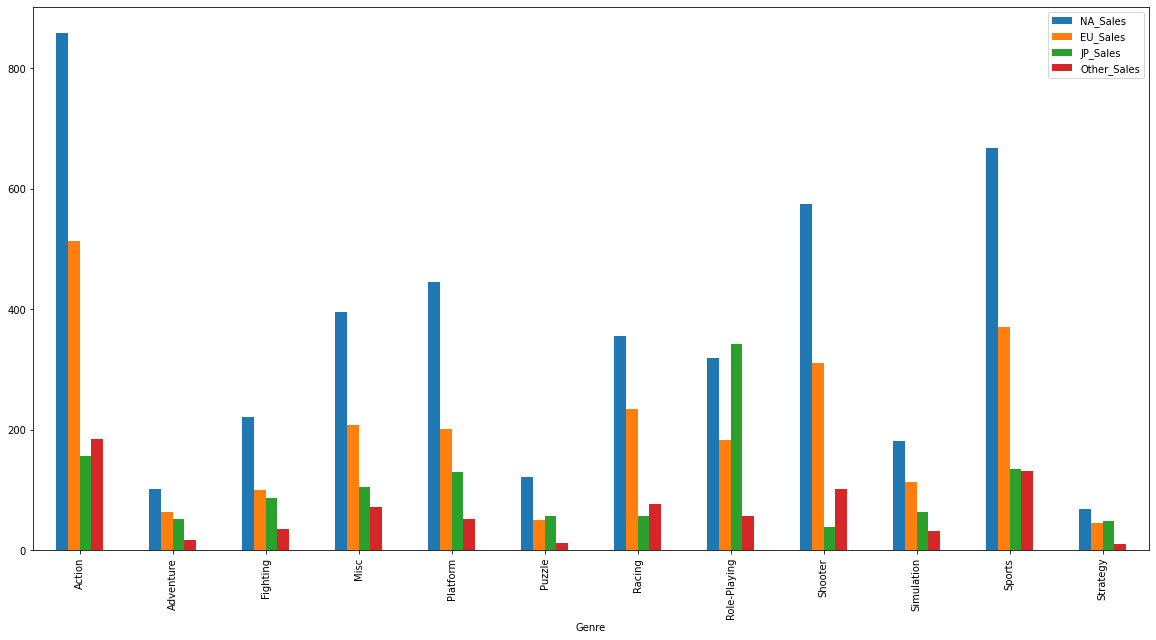

In [20]:
import matplotlib.pyplot as plt
import numpy as np


dfgroup.plot(x="Genre", y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], kind="bar",figsize=(20,10))
plt.show()


In [22]:
dfgroup['all_Sales'] = dfgroup['NA_Sales'] + dfgroup['JP_Sales'] + dfgroup['EU_Sales'] + dfgroup['Other_Sales']
dfgroup

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_Sales
0,Action,858.75,513.64,156.60,183.99,1712.98
1,Adventure,101.79,63.66,51.87,16.70,234.02
2,Fighting,220.35,99.90,87.14,36.15,443.54
3,Misc,394.73,208.15,104.18,72.64,779.70
4,Platform,445.38,200.63,130.53,51.45,827.99
5,Puzzle,121.58,50.47,56.24,12.44,240.73
6,Racing,354.70,235.02,56.32,76.51,722.55
7,Role-Playing,318.76,183.09,342.93,56.73,901.51
8,Shooter,574.48,310.23,38.18,101.86,1024.75
9,Simulation,181.43,112.99,63.54,31.32,389.28


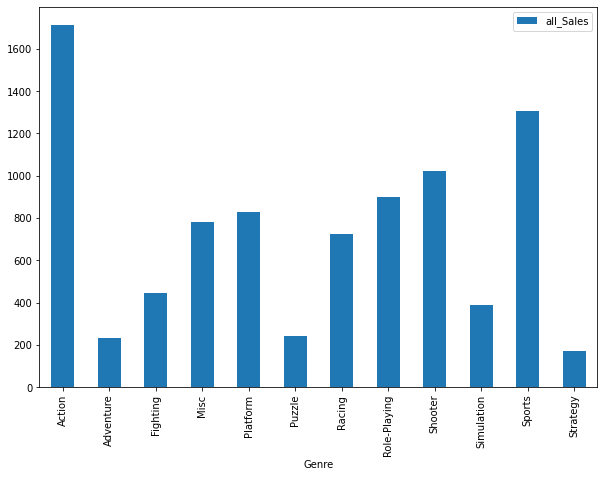

In [23]:
dfgroup.plot(x="Genre", y=["all_Sales"], kind="bar",figsize=(10,7))
plt.show()


# **7. 연도 별 게임 트렌드**

In [49]:
dfYear = df.iloc[:,2:4]
dfgroup2 = dfYear.groupby(by=['Year'], as_index=False)

dfgroup2.describe()

Year                                                     
     count    mean  std     min     25%     50%     75%     max
0      8.0  1980.0  0.0  1980.0  1980.0  1980.0  1980.0  1980.0
1     46.0  1981.0  0.0  1981.0  1981.0  1981.0  1981.0  1981.0
2     36.0  1982.0  0.0  1982.0  1982.0  1982.0  1982.0  1982.0
3     17.0  1983.0  0.0  1983.0  1983.0  1983.0  1983.0  1983.0
4     14.0  1984.0  0.0  1984.0  1984.0  1984.0  1984.0  1984.0
5     14.0  1985.0  0.0  1985.0  1985.0  1985.0  1985.0  1985.0
6     21.0  1986.0  0.0  1986.0  1986.0  1986.0  1986.0  1986.0
7     16.0  1987.0  0.0  1987.0  1987.0  1987.0  1987.0  1987.0
8     15.0  1988.0  0.0  1988.0  1988.0  1988.0  1988.0  1988.0
9     17.0  1989.0  0.0  1989.0  1989.0  1989.0  1989.0  1989.0
10    16.0  1990.0  0.0  1990.0  1990.0  1990.0  1990.0  1990.0
11    41.0  1991.0  0.0  1991.0  1991.0  1991.0  1991.0  1991.0
12    43.0  1992.0  0.0  1992.0  1992.0  1992.0  1992.0  1992.0
13    60.0  1993.0  0.0  1993.0  1993.0  1993.0  1993.0  1993.0
14   121.0  1994.0  0.0  1994.0  1994.0  1994.0  1994.0  1994.0
15   219.0  1995.0  0.0  1995.0  1995.0  1995.0  1995.0  1995.0
16   262.0  1996.0  0.0  1996.0  1996.0  1996.0  1996.0  1996.0
17   289.0  1997.0  0.0  1997.0  1997.0  1997.0  1997.0  1997.0
18   377.0  1998.0  0.0  1998.0  1998.0  1998.0  1998.0  1998.0
19   336.0  1999.0  0.0  1999.0  1999.0  1999.0  1999.0  1999.0
20   348.0  2000.0  0.0  2000.0  2000.0  2000.0  2000.0  2000.0
21   480.0  2001.0  0.0  2001.0  2001.0  2001.0  2001.0  2001.0
22   826.0  2002.0  0.0  2002.0  2002.0  2002.0  2002.0  2002.0
23   774.0  2003.0  0.0  2003.0  2003.0  2003.0  2003.0  2003.0
24   740.0  2004.0  0.0  2004.0  2004.0  2004.0  2004.0  2004.0
25   934.0  2005.0  0.0  2005.0  2005.0  2005.0  2005.0  2005.0
26  1005.0  2006.0  0.0  2006.0  2006.0  2006.0  2006.0  2006.0
27  1195.0  2007.0  0.0  2007.0  2007.0  2007.0  2007.0  2007.0
28  1423.0  2008.0  0.0  2008.0  2008.0  2008.0  2008.0  2008.0
29  1428.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0
30  1253.0  2010.0  0.0  2010.0  2010.0  2010.0  2010.0  2010.0
31  1133.0  2011.0  0.0  2011.0  2011.0  2011.0  2011.0  2011.0
32   652.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0
33   545.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0
34   580.0  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0
35   611.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0
36   342.0  2016.0  0.0  2016.0  2016.0  2016.0  2016.0  2016.0
37     3.0  2017.0  0.0  2017.0  2017.0  2017.0  2017.0  2017.0
38     1.0  2020.0  NaN  2020.0  2020.0  2020.0  2020.0  2020.0